In [1]:
# Importing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings

In [12]:
warnings.filterwarnings("ignore")
%matplotlib inline

# Parameters
vocab_size = 10000
max_len = 200

In [15]:
data = pd.read_csv('/content/IMDBDataset.csv', quoting=3, escapechar='\\', on_bad_lines='warn')

In [16]:
print(data.head())

In [17]:
X = data['review'].astype(str).values
y = data['sentiment'].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:

# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)

In [20]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [21]:
# Padding
x_train_pad = tf.keras.preprocessing.sequence.pad_sequences(x_train_seq, maxlen=max_len)
x_test_pad = tf.keras.preprocessing.sequence.pad_sequences(x_test_seq, maxlen=max_len)

In [22]:
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
# Build the model by calling it with a sample input
# This will infer the input shapes and initialize the model's weights
model.build(input_shape=(None, max_len))

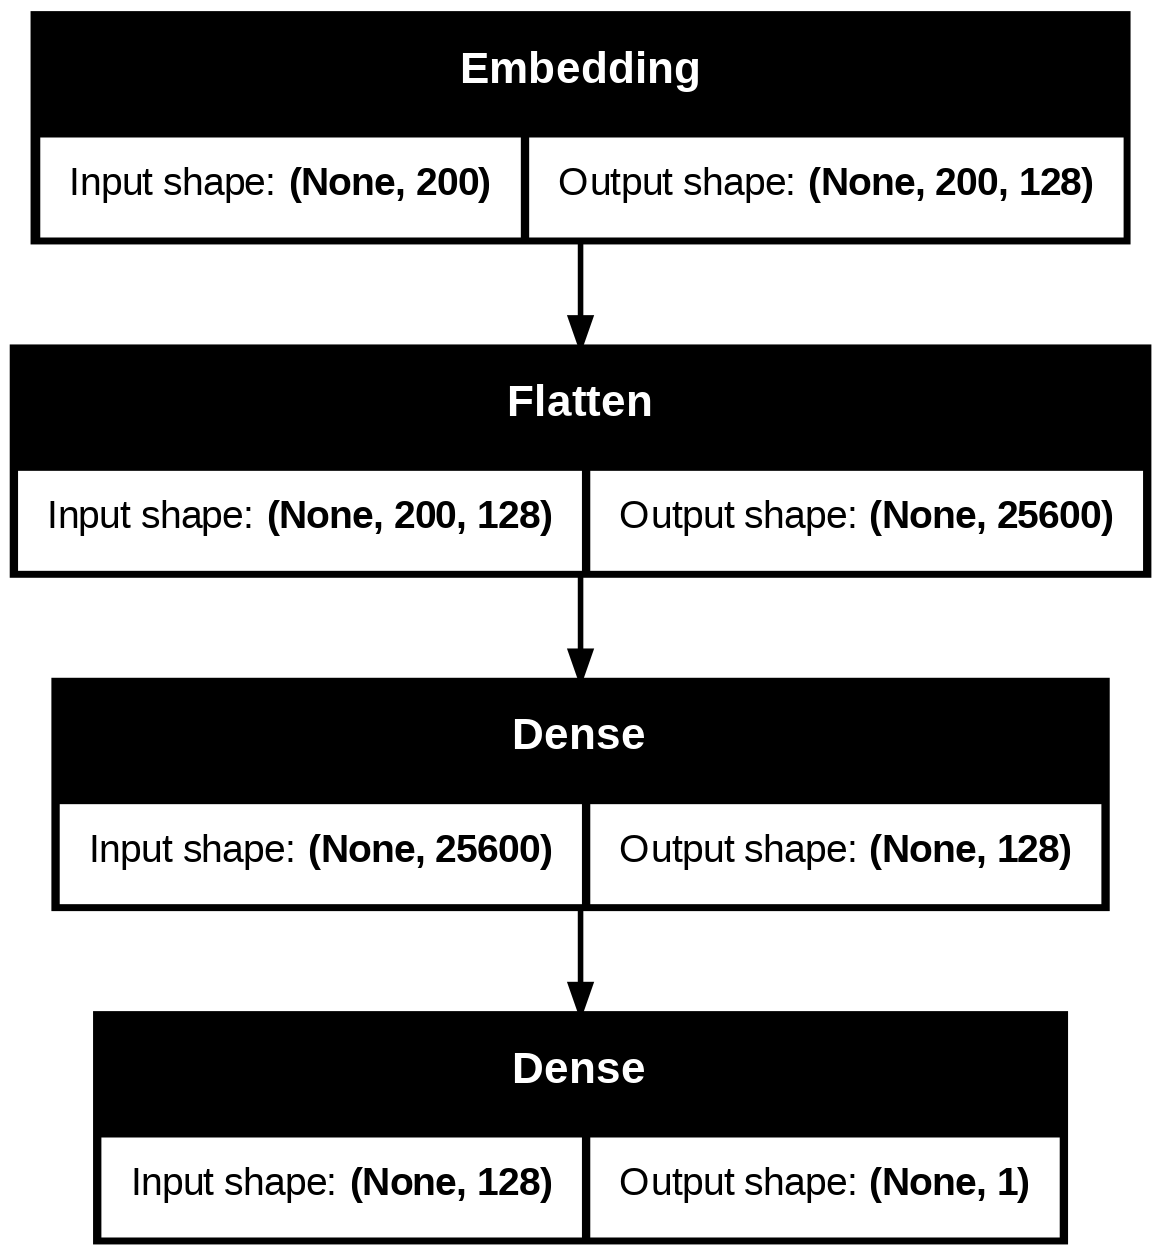

In [25]:
# Plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,557,057 (17.38 MB)

 Trainable params: 4,557,057 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# ... (previous code) ...

# Convert 'positive' and 'negative' to 1 and 0 respectively
y_train = np.where(y_train == 'positive', 1, 0)
y_test = np.where(y_test == 'positive', 1, 0)

# ... (rest of the code, including model.fit) ...

In [30]:
# Train
history = model.fit(x_train_pad, y_train, batch_size=128, epochs=5, validation_data=(x_test_pad, y_test))

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.9971 - loss: 0.1673 - val_accuracy: 0.9949 - val_loss: 0.0449
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9957 - loss: 0.0510 - val_accuracy: 0.9949 - val_loss: 0.0299
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.9957 - loss: 0.0227 - val_accuracy: 0.9949 - val_loss: 0.0167
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9949 - val_loss: 0.0080
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9996 - loss: 0.0036 - val_accuracy: 0.9966 - val_loss: 0.0060


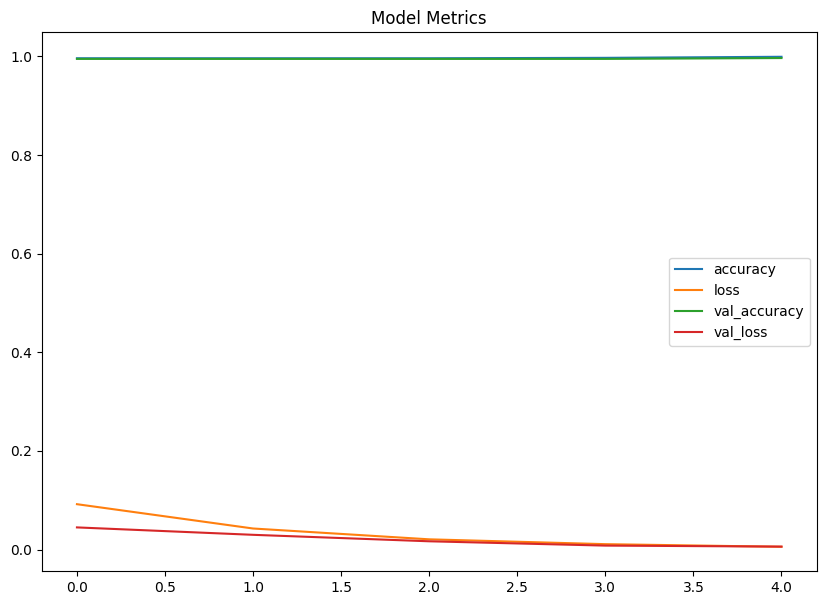

In [31]:
# Plot metrics
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.title("Model Metrics")
plt.show()

In [32]:

# Evaluate
loss, accuracy = model.evaluate(x_test_pad, y_test)
print("Test Accuracy:", accuracy)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9971 - loss: 0.0058
Test Accuracy: 0.9965811967849731


In [33]:
# Predict
y_pred = model.predict(x_test_pad).flatten()
y_pred_binary = (y_pred > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [34]:
# Classification report
print(metrics.classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       0.67      0.67      0.67         3

    accuracy                           1.00       585
   macro avg       0.83      0.83      0.83       585
weighted avg       1.00      1.00      1.00       585



In [36]:
def plot_confusion_matrix(cm, class_names):
    """
    Plots a confusion matrix using Seaborn heatmap.

    Args:
        cm: The confusion matrix.
        class_names: A list of class names.
    """

    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(10,7))
    sns.heatmap(df_cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


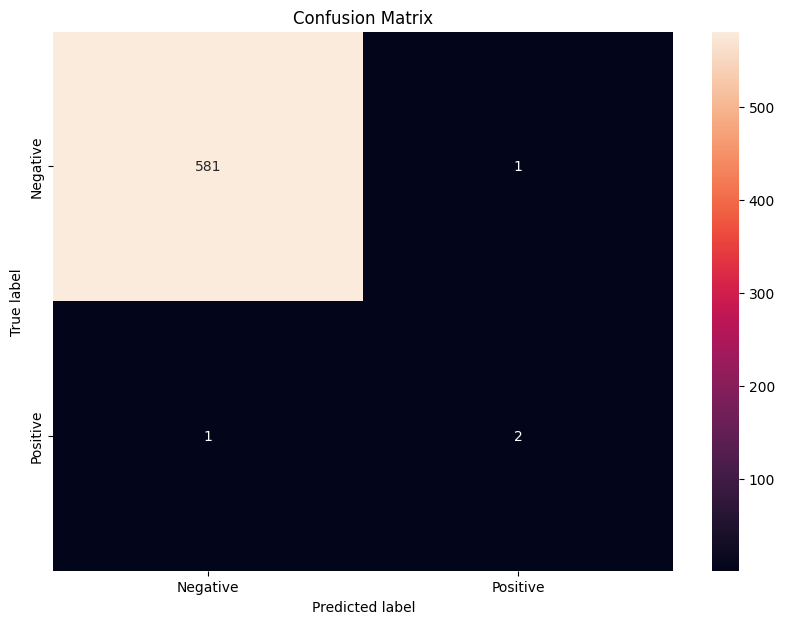

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred_binary)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive']) # Calling the defined function
plt.title("Confusion Matrix")
plt.show()